In [3]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/home/sergio/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [5]:
#features and target selection
features = ['date','starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [6]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'date'] = le.fit_transform(X['date'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,starting_ct,rank_1,rank_2
0,1541,2,62,63
1,1541,2,62,63
2,1541,1,140,118
3,1541,2,61,38
4,1541,2,61,38


In [18]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

forest = RandomForestClassifier(max_features=2, n_estimators=100, random_state=0)

In [19]:
forest.fit(X_train, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
print('Train score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test score: {:.3f}'.format(forest.score(X_test, y_test)))

Train score: 0.937
Test score: 0.611


Features importance: 
[0.39629555 0.05125941 0.27456684 0.2778782 ]


Text(0, 0.5, 'Feature')

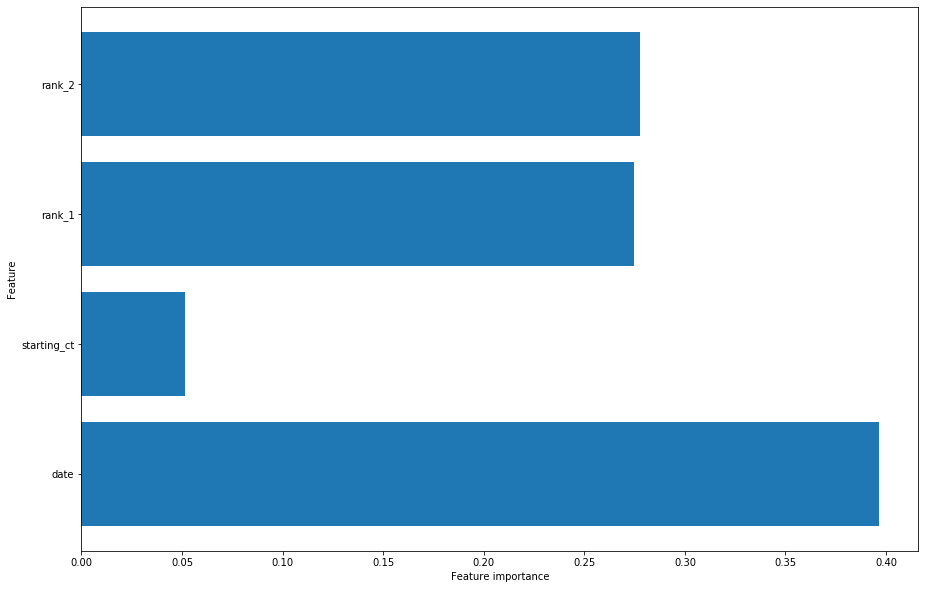

In [14]:
print('Features importance: \n{}'.format(forest.feature_importances_))

n_features = len(features)
plt.figure(figsize=(15, 10))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")